<a href="https://colab.research.google.com/github/danismoreirasilva/machine_learning_dp_ufsc/blob/main/trabalho_final_Daniela.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Referência do Data set:

Citation Request:

This dataset is public available for research. The details are described in [Moro et al., 2014].
Please include this citation if you plan to use this database:

[Moro et al., 2014] S. Moro, P. Cortez and P. Rita. A Data-Driven Approach to Predict the Success of Bank Telemarketing. Decision Support Systems, Elsevier, 62:22-31, June 2014

Disponível em: https://archive.ics.uci.edu/ml/datasets/bank+marketing

# 1 à 5 - Etapas básicas - Classificação

## 1 - Pré-processamento - ETL (Carga de Dados)

In [31]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [278]:
import pandas as pd

df = pd.read_csv('/content/drive/MyDrive/Doutorado UFSC/Machine Learning e Deepen Learning/Datasets/bank.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB


## 2 - Codificação das Variáveis Categóricas (caso existam)

In [279]:
#tratando os dados das variáveis binárias para ser 1 ou 0
'''
df['default'] = df['default'].replace('no', 0)
df['default'] = df['default'].replace('yes', 1)

df['housing'] = df['housing'].replace('no', 0)
df['housing'] = df['housing'].replace('yes', 1)

df['loan'] = df['loan'].replace('no', 0)
df['loan'] = df['loan'].replace('yes', 1)
'''

df['y'] = df['y'].replace('no', 0)
df['y'] = df['y'].replace('yes', 1)

In [280]:
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,0
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,0
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,0
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,0
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,services,married,secondary,no,-333,yes,no,cellular,30,jul,329,5,-1,0,unknown,0
4517,57,self-employed,married,tertiary,yes,-3313,yes,yes,unknown,9,may,153,1,-1,0,unknown,0
4518,57,technician,married,secondary,no,295,no,no,cellular,19,aug,151,11,-1,0,unknown,0
4519,28,blue-collar,married,secondary,no,1137,no,no,cellular,6,feb,129,4,211,3,other,0


In [281]:
#esse método selecione as varivéis que são categóricas e transforma em colunas, com valores binários, 
#e deleta a primeira coluna das colunas criadas de cada variável
df = pd.get_dummies(df, drop_first = True)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 43 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   age                  4521 non-null   int64
 1   balance              4521 non-null   int64
 2   day                  4521 non-null   int64
 3   duration             4521 non-null   int64
 4   campaign             4521 non-null   int64
 5   pdays                4521 non-null   int64
 6   previous             4521 non-null   int64
 7   y                    4521 non-null   int64
 8   job_blue-collar      4521 non-null   uint8
 9   job_entrepreneur     4521 non-null   uint8
 10  job_housemaid        4521 non-null   uint8
 11  job_management       4521 non-null   uint8
 12  job_retired          4521 non-null   uint8
 13  job_self-employed    4521 non-null   uint8
 14  job_services         4521 non-null   uint8
 15  job_student          4521 non-null   uint8
 16  job_technician       452

## 3 - Separar as variáveis independentes (X) da variável target, alvo (Y)

In [282]:
#Separando as variaveis independentes (X) da variável target, alvo, (y)

#seleciona todas as colunas menos a coluna "y" do dataset Bank.csv que é a variável alvo
X = df.drop(['y'], axis = 1)

#y = df.iloc[:,10:11]
y = df.iloc[:,7:8]

In [ ]:
X.info()

In [284]:
type(X), type(y)

(pandas.core.frame.DataFrame, pandas.core.frame.DataFrame)

### Transforma os dataFrames em Arrays

In [285]:
X = X.values
y = y.values

## 4 - Separação dos Conjuntos de Treinamento e Testes

In [286]:
from sklearn.model_selection import train_test_split

X_treino, X_teste, y_treino, y_teste = train_test_split(X, y, test_size = 0.2, random_state = 0)

X_treino.shape, X_teste.shape, y_treino.shape, y_teste.shape

((3616, 42), (905, 42), (3616, 1), (905, 1))

In [287]:
type(y_teste)

numpy.ndarray

## 5 - Normalização das variáveis (deixar com a mesma amplitude) - Escalar (Scalling)

In [288]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_treino = sc.fit_transform(X_treino)
X_teste = sc.transform(X_teste)


# 6 - Criando os Modelos

## 6.1 Logistic Regression

In [289]:
from sklearn.linear_model import LogisticRegression

modelo_log = LogisticRegression(random_state = 0)
modelo_log.fit(X_treino,y_treino)
y_pred_log = modelo_log.predict(X_teste)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


## 6.2 SVM

In [351]:
from sklearn.svm import SVC

modelo_svm = SVC(kernel='poly', random_state = 0)# rbf , polinomial
modelo_svm.fit(X_treino,y_treino)
y_pred_svm = modelo_svm.predict(X_teste)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


## 6.3 Random Forest Classifier

In [401]:
from sklearn.ensemble import RandomForestClassifier

modelo_rf = RandomForestClassifier(n_estimators = 25, random_state = 0)
modelo_rf.fit(X_treino,y_treino)
y_pred_rf = modelo_rf.predict(X_teste)

<ipython-input-401-4cc48c83aeab>:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  modelo_rf.fit(X_treino,y_treino)


## 6.4 KNN

In [445]:
from sklearn.neighbors import KNeighborsClassifier

modelo_knn = KNeighborsClassifier(n_neighbors = 3)
modelo_knn.fit(X_treino,y_treino)
y_pred_knn = modelo_knn.predict(X_teste)

/usr/local/lib/python3.8/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


## 6.5 RNA

### 6.5.1 Definindo Arquitetura

In [597]:
import keras
from keras.models import Sequential
from keras.layers import Dense

#instancia um modelo do tipo Sequential, para determinar a quantidade de camadas
modelo_rna = Sequential()

#camada de entrada - denso porque se conecta com todos os outros nós da próxima camada
#units são os neurônios que correspodem as variavéis de entrada - neste exemplo 42
# kernel_initializer inicialização dos pesos na camada de entrada
#activation função de ativação relu não é necessariamente binária, mas a sigmoide é
modelo_rna.add(Dense(units=42, kernel_initializer='uniform', activation='relu'))

#Camadas Ocultas units=42, esse valor deve ser modificado a medida em que os testes vão sendo realizados
modelo_rna.add(Dense(units=42, kernel_initializer='uniform', activation='sigmoid'))
modelo_rna.add(Dense(units=42, kernel_initializer='uniform', activation='sigmoid'))
modelo_rna.add(Dense(units=42, kernel_initializer='uniform', activation='sigmoid'))


#Camadas saída - units=1 - binario, tem só 1 neurônio
modelo_rna.add(Dense(units=1, kernel_initializer='uniform', activation='sigmoid'))

### 6.5.2 Compilando e Treinando o modelo

In [598]:
#compilando a RNA
#optimizer rmspop
#loss='crossentropy' quando tem mais de uma classe
#época de treinamento - ida até a camada oculta
#batch_size - otimização de memória, quantidade de dados que ele pega por vez, lote de 32 no treinamento neste exemplo

modelo_rna.compile(optimizer='adam',loss='binary_crossentropy', metrics=['accuracy'])
modelo_rna.fit(X_treino, y_treino, epochs=50, batch_size=32)

Epoch 1/50
113/113 [==============================] - 1s 3ms/step - loss: 0.4165 - accuracy: 0.8869
Epoch 2/50
113/113 [==============================] - 0s 3ms/step - loss: 0.3497 - accuracy: 0.8869
Epoch 3/50
113/113 [==============================] - 0s 3ms/step - loss: 0.3441 - accuracy: 0.8869
Epoch 4/50
113/113 [==============================] - 0s 3ms/step - loss: 0.3365 - accuracy: 0.8869
Epoch 5/50
113/113 [==============================] - 0s 3ms/step - loss: 0.3285 - accuracy: 0.8869
Epoch 6/50
113/113 [==============================] - 0s 3ms/step - loss: 0.3178 - accuracy: 0.8869
Epoch 7/50
113/113 [==============================] - 0s 3ms/step - loss: 0.3071 - accuracy: 0.8869
Epoch 8/50
113/113 [==============================] - 0s 3ms/step - loss: 0.2917 - accuracy: 0.8869
Epoch 9/50
113/113 [==============================] - 0s 3ms/step - loss: 0.2754 - accuracy: 0.8869
Epoch 10/50
113/113 [==============================] - 0s 3ms/step - loss: 0.2577 - accuracy: 0.8869

In [ ]:
y_pred_rna = modelo_rna.predict(X_teste)

#transformando os valores em true e False. Se > 0.5 é True - devido a saída ser sigmoide
y_pred_rna = (y_pred_rna > 0.5)
y_pred_rna

# Avaliação dos Modelos

## Matriz de Confusão

In [600]:
# Classification Report (Recall, Precision, F1-Score, Acc)
# https://towardsdatascience.com/the-5-classification-evaluation-metrics-you-must-know-aa97784ff226
from sklearn.metrics import confusion_matrix

cm_log = confusion_matrix(y_teste,y_pred_log)
cm_svm = confusion_matrix(y_teste,y_pred_svm)
cm_rf = confusion_matrix(y_teste,y_pred_rf)
cm_knn = confusion_matrix(y_teste,y_pred_knn)
cm_rna = confusion_matrix(y_teste,y_pred_rna)

In [ ]:
cm_log

In [ ]:
cm_svm

In [ ]:
cm_rf

In [ ]:
cm_knn

In [601]:
cm_rna

array([[742,  51],
       [ 41,  71]])

## Acurácia

In [602]:
acc_log = (cm_log[0,0]+cm_log[1,1])/cm_log.sum()
acc_svm = (cm_svm[0,0]+cm_svm[1,1])/cm_svm.sum()
acc_rf = (cm_rf[0,0]+cm_rf[1,1])/cm_rf.sum()
acc_knn = (cm_knn[0,0]+cm_knn[1,1])/cm_knn.sum()
acc_rna = (cm_rna[0,0]+cm_rna[1,1])/cm_rna.sum()

In [603]:
print('Acurácia -> Logistic Regression: ', acc_log)
print('Acurácia -> SVM: ', acc_svm)
print('Acurácia -> Random Fortest: ', acc_rf)
print('Acurácia -> Knn: ', acc_knn)
print('Acurácia -> RNA: ', acc_rna )

Acurácia -> Logistic Regression:  0.9049723756906077
Acurácia -> SVM:  0.8928176795580111
Acurácia -> Random Fortest:  0.9093922651933701
Acurácia -> Knn:  0.8806629834254144
Acurácia -> RNA:  0.8983425414364641


In [604]:
from sklearn.metrics import f1_score

f1_log = f1_score(y_teste,y_pred_log)
f1_svm = f1_score(y_teste,y_pred_svm)  
f1_rf = f1_score(y_teste,y_pred_rf) 
f1_knn = f1_score(y_teste,y_pred_knn) 
f1_rna = f1_score(y_teste,y_pred_rna) 

In [605]:
print('F1 Logistic Regression: ', f1_log)
print('F1 SVM: ', f1_svm)
print('F1 Random Fortest: ', f1_rf)
print('F1 Knn: ', f1_knn)
print('F1 RNA: ', f1_rna)

F1 Logistic Regression:  0.5222222222222223
F1 SVM:  0.389937106918239
F1 Random Fortest:  0.5060240963855422
F1 Knn:  0.34939759036144574
F1 RNA:  0.6068376068376068


## Métricas: Precision, Recall, F1-Score, Support

In [608]:
from sklearn.metrics import classification_report

classes = ['Classe 0', 'Classe 1']

In [614]:
print('1 - Modelo Logistic Regression')
print(classification_report(y_pred_log, y_teste, target_names=classes))

1 - Modelo Logistic Regression
              precision    recall  f1-score   support

    Classe 0       0.97      0.92      0.95       837
    Classe 1       0.42      0.69      0.52        68

    accuracy                           0.90       905
   macro avg       0.70      0.81      0.73       905
weighted avg       0.93      0.90      0.92       905



In [615]:
print('2 - Modelo SVM')
print(classification_report(y_pred_svm, y_teste, target_names=classes))

2 - Modelo SVM
              precision    recall  f1-score   support

    Classe 0       0.98      0.91      0.94       858
    Classe 1       0.28      0.66      0.39        47

    accuracy                           0.89       905
   macro avg       0.63      0.78      0.67       905
weighted avg       0.94      0.89      0.91       905



In [619]:
print('3 - Modelo Random Forest')
print(classification_report(y_pred_rf, y_teste, target_names=classes))

3 - Modelo Random Forest
              precision    recall  f1-score   support

    Classe 0       0.98      0.92      0.95       851
    Classe 1       0.38      0.78      0.51        54

    accuracy                           0.91       905
   macro avg       0.68      0.85      0.73       905
weighted avg       0.95      0.91      0.92       905



In [617]:
print('4 - Modelo KNN')
print(classification_report(y_pred_knn, y_teste, target_names=classes))

4 - Modelo KNN
              precision    recall  f1-score   support

    Classe 0       0.97      0.90      0.93       851
    Classe 1       0.26      0.54      0.35        54

    accuracy                           0.88       905
   macro avg       0.61      0.72      0.64       905
weighted avg       0.93      0.88      0.90       905



In [618]:
print('Métricas referente ao Modelo RNA')
print(classification_report(y_pred_rna, y_teste, target_names=classes))

Métricas referente ao Modelo RNA
              precision    recall  f1-score   support

    Classe 0       0.94      0.95      0.94       783
    Classe 1       0.63      0.58      0.61       122

    accuracy                           0.90       905
   macro avg       0.78      0.76      0.77       905
weighted avg       0.90      0.90      0.90       905



In [84]:
type(y_teste), type(y_pred_log)

(numpy.ndarray, numpy.ndarray)

# Visualização Gráfica das Predições

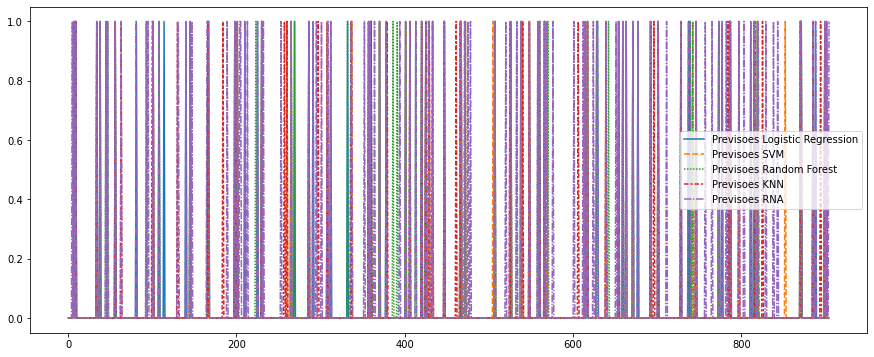

In [620]:
import seaborn as sns
import matplotlib.pyplot as plt

tabela_auxiliar = pd.DataFrame()
#tabela_auxiliar["y_teste"] = y_teste
tabela_auxiliar["Previsoes Logistic Regression"] = y_pred_log
tabela_auxiliar["Previsoes SVM"] = y_pred_svm
tabela_auxiliar["Previsoes Random Forest"] = y_pred_rf
tabela_auxiliar["Previsoes KNN"] = y_pred_knn
tabela_auxiliar["Previsoes RNA"] = y_pred_rna


plt.figure(figsize=(15,6))
sns.lineplot(data=tabela_auxiliar)
plt.show()
